<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1 
# *Logistic Regression, Support Vector Machines & Naive Bayes*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats


%matplotlib inline

### 2. EDA 

- Explore dataset. Clean data (if required)


- Define Target, Predictors
- Train-Test Split

In [4]:
data = pd.read_csv(breast_cancer_csv)

In [5]:
data = data.drop(['Unnamed: 32'], axis = 1)
data.drop(['id'], axis=1, inplace=True)

In [6]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
data["diagnosis"].replace({"M": 1, "B": 0}, inplace=True)
print(data)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

In [8]:
data['diagnosis'].value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

In [9]:
data.corr()['diagnosis'].sort_values(ascending = False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Target Variable
y = data['diagnosis']
#Select all predictors except target variable
X = data.drop('diagnosis', axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)


In [12]:
y = data['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression (liblinear solver)

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Evaluate Model

In [13]:
lgmodel = LogisticRegression(solver='liblinear')
lgmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [14]:
#training set score
lgmodel.score(X_train, y_train)

0.958005249343832

In [15]:
#test set score
lgmodel.score(X_test, y_test)

0.9521276595744681

In [16]:
y_pred = lgmodel.predict(X_test)
y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9521


In [17]:
predicted = lgmodel.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)

[[119   4]
 [  5  60]]


In [18]:
lgmodel.predict(np.array(X_test))

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [19]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       123
           1       0.94      0.92      0.93        65

    accuracy                           0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188



### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine (linear)

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Evaluate Model

In [20]:
from sklearn import svm
from sklearn.svm import SVC
svm_model = svm.SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [21]:
svm_model.score(X_test, y_test)

0.9468085106382979

In [22]:
y_pred = svm_model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac)

Accuracy is:  0.9468085106382979


In [24]:
y_predict=svm_model.predict(X_test)
cm = np.array(confusion_matrix(y_test, y_predict, labels = [1,0]))
confusionMatrix = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                              columns=['predicted_cancer', 'predicted_healthy'])
confusionMatrix

,predicted_cancer,predicted_healthy
is_cancer,59,6
is_healthy,4,119


classifier_predictions = clf.predict(X)
print(accuracy_score(y,classifier_predictions)*100)

In [260]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       123
           1       0.88      0.82      0.85        65

    accuracy                           0.90       188
   macro avg       0.89      0.88      0.89       188
weighted avg       0.90      0.90      0.90       188



### 5. Naive Bayes
#### 5.1 Use Naive Bayes (Gaussian classifier)

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Evaluate Model

In [186]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [187]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [188]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9468


In [189]:
#training set score
gnb.score(X_train, y_train)

0.9396325459317585

In [190]:
#test set score
gnb.score(X_test, y_test)

0.9468085106382979

In [191]:
cm = np.array(confusion_matrix(y_test, y_pred, labels = [1,0]))
confusionMatrix = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                              columns=['predicted_cancer', 'predicted_healthy'])
confusionMatrix

,predicted_cancer,predicted_healthy
is_cancer,60,5
is_healthy,5,118


In [192]:
print('True Positives(TP) = ', cm[0,0])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])
print('True Negatives(TN) = ', cm[1,1])

True Positives(TP) =  60
False Positives(FP) =  5
False Negatives(FN) =  5
True Negatives(TN) =  118


In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       123
           1       0.92      0.92      0.92        65

    accuracy                           0.95       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



### 6. Gridsearch optimal parameters for models.

Is there any difference between accuracy score of Logistic Regression, SVM and Naive Bayes? Use grid search to find optimal parameters for Logistic Regression and SVM models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [194]:
from sklearn.model_selection import GridSearchCV


lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,lr_params,n_jobs=-1)
logreg_cv.fit(X,y)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2'}
accuracy : 0.9472752678155567


C:\Users\65911\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.94727527        nan 0.93496351        nan 0.94379755]
  warnings.warn(
C:\Users\65911\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [195]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.9361702127659575


C:\Users\65911\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [196]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

svc_model = SVC()
svc_cv = GridSearchCV(svc_model,svc_params,n_jobs=-1)
svc_cv.fit(X,y)

print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
print("accuracy :",svc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.9543083372147182


In [197]:
svc_cv2 = SVC(C=100,gamma=0.001,kernel='linear')
svc_cv2.fit(X,y)
print("score",svc_cv2.score(X,y))

score 0.9701230228471002


#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

In [200]:
from sklearn import metrics

In [201]:
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.941213258286429

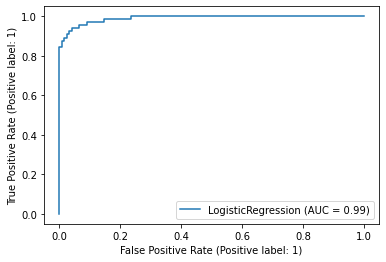

In [227]:
metrics.plot_roc_curve(model, X_test, y_test)
plt.show() 

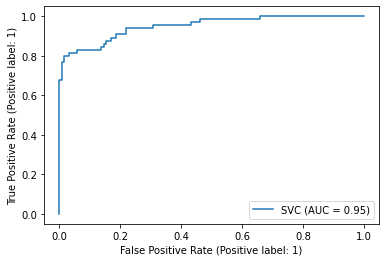

In [225]:
metrics.plot_roc_curve(svc_model, X_test, y_test)
plt.show() 

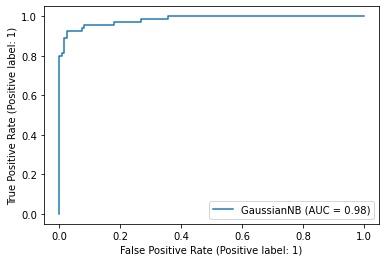

In [229]:
metrics.plot_roc_curve(gnb, X_test, y_test)
plt.show() 

In [213]:
from sklearn.metrics import roc_curve, auc

# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc1 = auc(fpr, tpr)



C:\Users\65911\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 432x288 with 0 Axes>

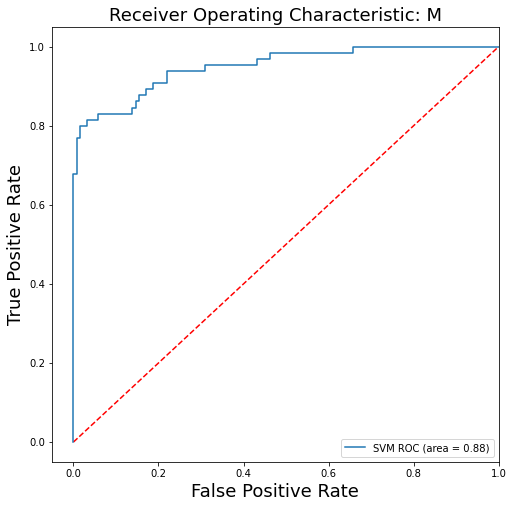

In [247]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Gaussian',
    'model': GaussianNB(),
},
{
    'label': 'SVM',
    'model': svm.SVC(probability=True),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))



plt.figure(figsize=[8,8])
plt.plot([0, 1], [0, 1], 'r--')
# Now, plot the computed values
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

No handles with labels found to put in legend.


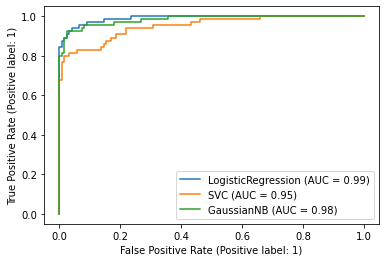

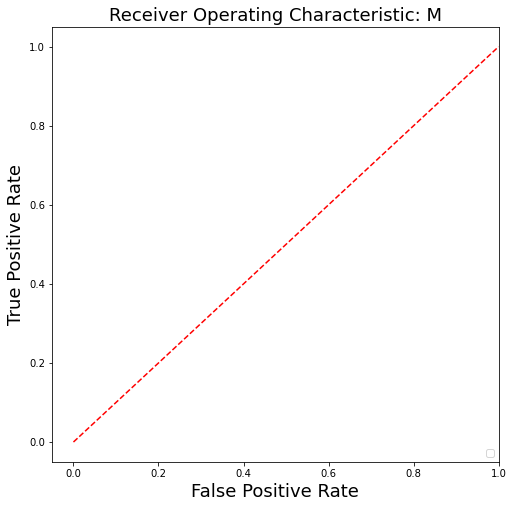

In [264]:
from sklearn.metrics import plot_roc_curve

classifiers = [lgmodel, svc_model, gnb]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

plt.figure(figsize=[8,8])
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

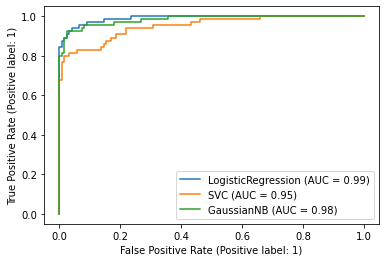

In [261]:
from sklearn.metrics import plot_roc_curve

classifiers = [lgmodel, svc_model, gnb]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

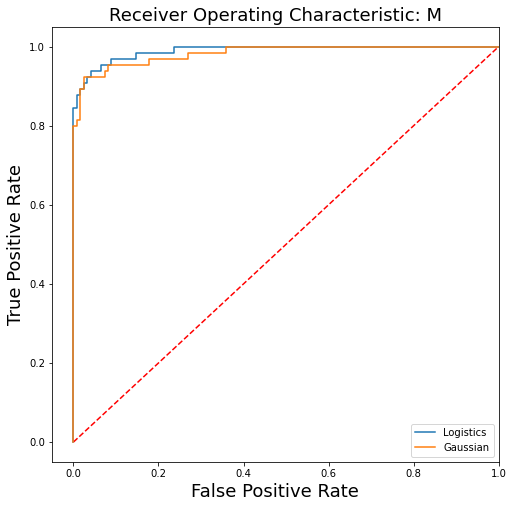

In [271]:
#ROC Curve
from sklearn.metrics import roc_curve
y_pred_prob1 = lgmodel.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

# y_pred_prob2 = svc_model.predict_proba(X_test)[:,1]
# fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = gnb.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

plt.figure(figsize=[8,8])
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr1, tpr1, label= "Logistics")
# plt.plot(fpr2, tpr2, label= "SVC")
plt.plot(fpr3, tpr3, label= "Gaussian")
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 7. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [0]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



